HELP international is an humanitarian NGO that fights poverty all over the world. Our task is to categorise the countries based on different socio-economic data to find those who are in the strongest need for support.

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Import dataset

In [2]:
df = pd.read_csv('country-data.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.shape

(167, 10)

There are 10 socio-economic variables on 167 different countries.

### Variable description

'country': Name of the country <br>
'child_mort': Death of children under age of 5 per births <br>
'exports': Exports of good and services per capita. Given as the percentage of GDP per capita <br>
'health': Total health spending per capita. Given as percentage of GDP per capita <br>
'imports': Imports of good and services per capita. Given as the percentage of GDP per capita <br>
'income': Net income per person <br>
'inflation': Growth rate of price index <br>
'life_expec': Expected number of years a new born will live <br>
'total_fer': Number of children that is born by each woman on average <br>
'gdpp': GDP per capita <br>

In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no missing values.

# Exploratory Analysis

## Univariate Analysis

In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Let's take the absolute values of exports, health and imports (per capita) as those are more useful for detecting a country's development I think.

In [7]:
df_edited = df.copy()

In [8]:
df_edited['exports'] = df_edited['exports']*df['gdpp']/100
df_edited['health'] = df_edited['health']*df['gdpp']/100
df_edited['imports'] = df_edited['imports']*df['gdpp']/100

In [9]:
df_edited.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Top 10 countries with the highest child mortality

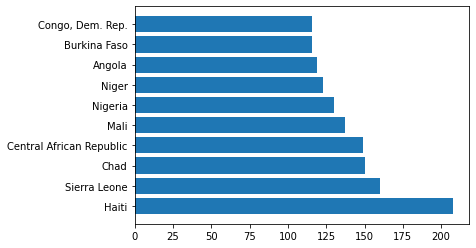

In [10]:
df_edited_child_mort = df_edited.sort_values('child_mort', ascending = False).iloc[:10]
plt.barh(df_edited_child_mort['country'], df_edited_child_mort['child_mort'])
plt.show()

### Top 10 countries with the lowest health spending as % of GDP

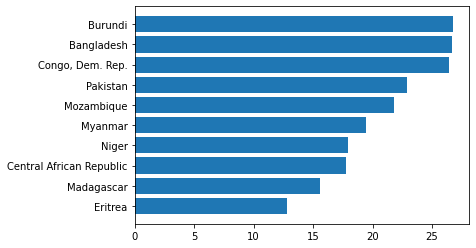

In [11]:
df_edited_health = df_edited.sort_values('health', ascending = True).iloc[:10]
plt.barh(df_edited_health['country'], df_edited_health['health'])
plt.show()

### Top 10 countries with the lowest income per capita

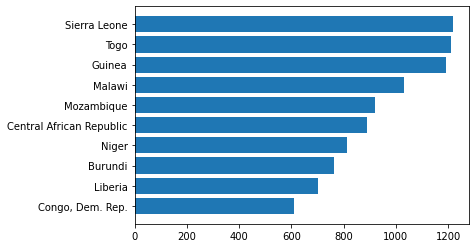

In [12]:
df_edited_income = df_edited.sort_values('income', ascending = True).iloc[:10]
plt.barh(df_edited_income['country'], df_edited_income['income'])
plt.show()

### Top 10 countries with the lowest life expectancy

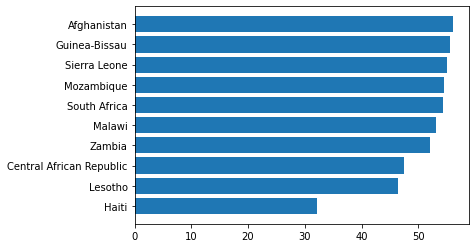

In [13]:
df_edited_life_exp = df_edited.sort_values('life_expec', ascending = True).iloc[:10]
plt.barh(df_edited_life_exp['country'], df_edited_life_exp['life_expec'])
plt.show()

### Top 10 countries with the lowest GDP per capita

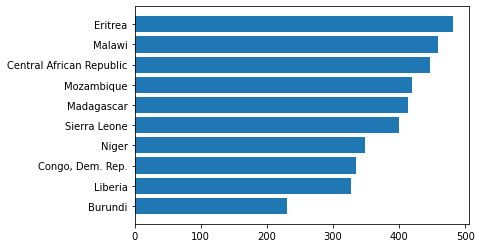

In [14]:
df_edited_gdp = df_edited.sort_values('gdpp', ascending = True).iloc[:10]
plt.barh(df_edited_gdp['country'], df_edited_gdp['gdpp'])
plt.show()

## Bivariate Analysis

### Heatmap

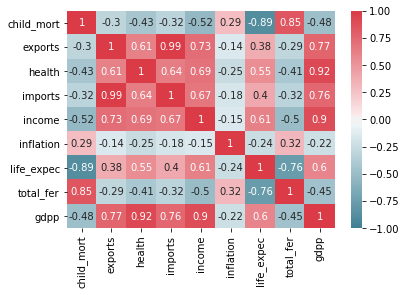

In [30]:
sns.heatmap(df_edited.corr(), 
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot = True)
plt.show()

### Is child mortality correlated with income?

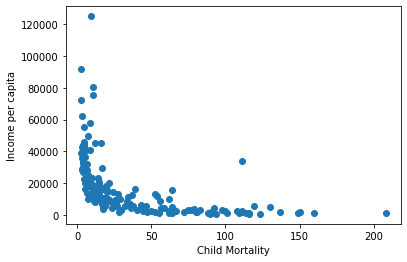

In [16]:
plt.scatter(x = df_edited['child_mort'], y = df_edited['income'])
plt.xlabel('Child Mortality')
plt.ylabel('Income per capita')
plt.show()

### Is life expectancy correlated with GDP?

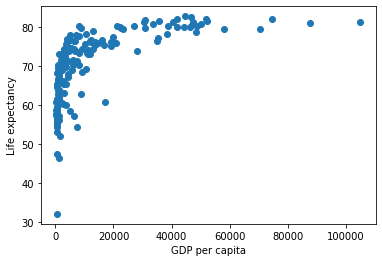

In [17]:
plt.scatter(x = df_edited['gdpp'], y = df_edited['life_expec'])
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.show()

# Principal Component Analysis

With PCA we can reduce the dimensionality of our dataset without losing too much information. There are some benefits by doing so. A lower dimensionality (e.g. less features) means that we improve the performance of our algorithm which will be K-Means clustering. The risk of overfitting is lower accordingly. Before applying PCA, it is important to standardize the data.

In [18]:
x = df_edited.iloc[:,1:]
scaler = StandardScaler()
df_std = scaler.fit_transform(x)

In [19]:
pca = PCA()

In [20]:
pca.fit(df_std)

PCA()

In [21]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

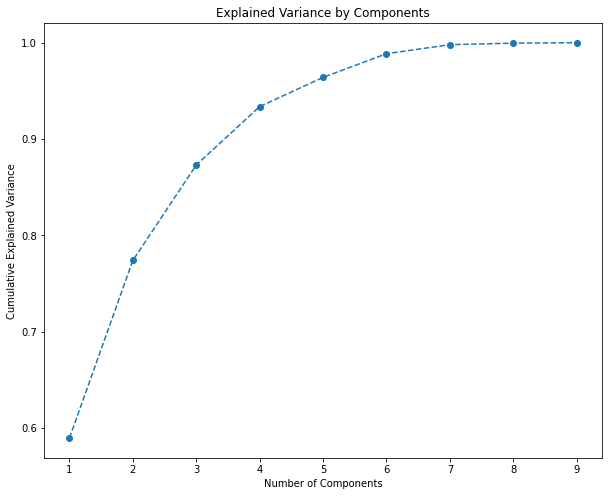

In [23]:
plt.figure(figsize = (10,8))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Keeping 4 Principal Components would reduce the number of features significantly while preserving most of the variability (more than 90% of the variance is explained)

In [24]:
pca = PCA(n_components = 4)
pca.fit(df_std)

PCA(n_components=4)

In [25]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239]])

In [27]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                          columns = x.columns.values,
                          index = ['PC1', 'PC2', 'PC3', 'PC4'])
df_pca_comp

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
PC1,-0.316392,0.342887,0.358535,0.344865,0.380041,-0.143085,0.343857,-0.302842,0.399988
PC2,0.476267,0.397311,0.155053,0.370781,0.128384,0.221261,-0.369820,0.459715,0.200624
PC3,-0.150012,-0.030574,-0.075703,-0.072174,0.145764,0.948419,0.196752,-0.077834,0.010339
PC4,-0.148052,0.449425,-0.599712,0.461798,-0.154806,-0.007628,-0.018395,-0.213928,-0.364772


This table shows the loadings of the components. The loadings are nothing else than the correlation coefficients between the components and the original features

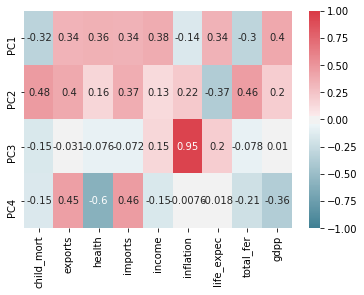

In [29]:
sns.heatmap(df_pca_comp,
           vmin = -1,
           vmax = 1,
           cmap=sns.diverging_palette(220, 10, as_cmap=True),
           annot = True)

In [31]:
pca.transform(df_std)

array([[-2.63557499e+00,  1.47226739e+00, -5.49488868e-01,
        -2.42325540e-01],
       [-2.42055643e-02, -1.42989187e+00, -1.41232909e-02,
         4.50645370e-01],
       [-4.59557398e-01, -6.75495376e-01,  9.59354680e-01,
         2.18455926e-01],
       [-2.72263028e+00,  2.17233183e+00,  6.00214575e-01,
        -4.33977682e-01],
       [ 6.48597043e-01, -1.02343678e+00, -2.57430041e-01,
         2.89201120e-01],
       [ 3.54221548e-02, -6.85250630e-01,  1.46869733e+00,
        -2.88383229e-02],
       [-3.34554724e-01, -1.27188941e+00,  1.90564198e-01,
         5.00246865e-01],
       [ 3.18152480e+00, -2.62484651e-01, -1.30870333e-01,
        -1.67835766e+00],
       [ 3.81685715e+00,  2.48363332e-01, -2.58960168e-01,
        -1.01816299e+00],
       [-4.67994708e-01, -4.92682084e-01,  6.09900309e-01,
         2.54611999e-01],
       [ 1.49896170e+00, -4.29631893e-01, -5.44543230e-01,
        -2.50326775e-01],
       [ 1.47088772e+00, -3.28925266e-01,  3.97297753e-01,
      

In [32]:
pca_scores = pca.transform(df_std)

# K-Means Clustering using PCA

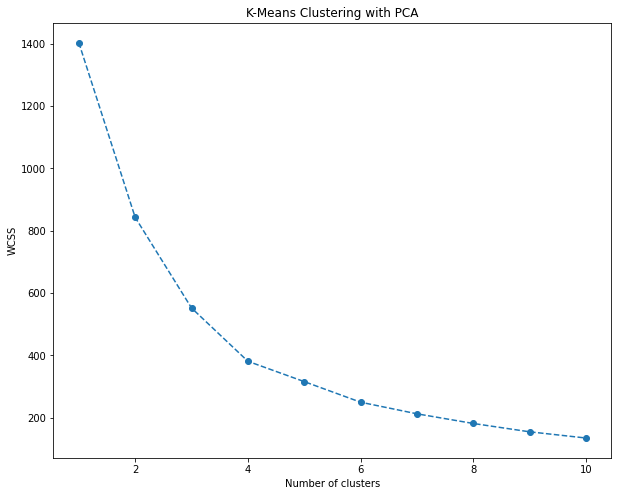

In [36]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               random_state = 10)
    km.fit(pca_scores)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

According to the elbow method, an appropriate choice would be 4 clusters.

In [37]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)

In [38]:
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=4, random_state=10)

In [41]:
df_kmeans_pca = pd.concat([df_edited, pd.DataFrame(pca_scores)], axis = 1)
df_kmeans_pca.columns.values[-4:] = ['PC1', 'PC2', 'PC3', 'PC4']
df_kmeans_pca['Segment K-Means PCA'] = kmeans_pca.labels_

In [42]:
df_kmeans_pca

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,Segment K-Means PCA
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.635575,1.472267,-0.549489,-0.242326,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.024206,-1.429892,-0.014123,0.450645,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459557,-0.675495,0.959355,0.218456,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.722630,2.172332,0.600215,-0.433978,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648597,-1.023437,-0.257430,0.289201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,-1.175210,-0.275652,-0.667131,0.279628,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,-0.314228,-0.016266,3.680273,0.011835,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,-0.594449,-1.076335,0.528875,0.508854,0
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,-1.802372,0.588729,1.180851,-0.020241,1


In [67]:
df_kmeans_pca_mean = df_kmeans_pca.groupby('Segment K-Means PCA').mean()
df_kmeans_pca_mean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4
Segment K-Means PCA,,,,,,,,,,,,,
0,20.918182,3366.778392,482.897845,3461.435467,13455.568182,7.295045,73.222727,2.242159,7332.636364,-0.073657,-0.846914,0.131840,0.292368
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,-2.277385,1.231258,-0.211436,-0.169223
2,5.082759,21511.096552,4084.970000,18129.900000,45800.000000,2.837690,80.403448,1.813793,44017.241379,3.329582,0.144841,-0.017686,-0.878951
3,2.800000,138475.000000,5001.930000,115092.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000,9.619236,5.613801,-0.470027,3.941955


In [68]:
df_kmeans_pca_mean = df_kmeans_pca_mean.rename(index = {0:'underdeveloped',
                                                        1:'poorest', 
                                                        2:'developed',
                                                        3:'well-off'})
df_kmeans_pca_mean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4
Segment K-Means PCA,,,,,,,,,,,,,
underdeveloped,20.918182,3366.778392,482.897845,3461.435467,13455.568182,7.295045,73.222727,2.242159,7332.636364,-0.073657,-0.846914,0.131840,0.292368
poorest,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,-2.277385,1.231258,-0.211436,-0.169223
developed,5.082759,21511.096552,4084.970000,18129.900000,45800.000000,2.837690,80.403448,1.813793,44017.241379,3.329582,0.144841,-0.017686,-0.878951
well-off,2.800000,138475.000000,5001.930000,115092.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000,9.619236,5.613801,-0.470027,3.941955


The mean values of the segments shows a clear picture. The poorest countries have the highest child mortality rate  by far with 92 deaths of children under 5 per 1000 births. They also have the lowest life expectancy and the highest fertility rate. Those results are tied to the economic circumstances. Income and GDP are quite low which have a lower spending on health as a consequence.

In [86]:
seg_0 = []
for i in range(len(df_kmeans_pca)):
    if df_kmeans_pca['Segment K-Means PCA'][i] == 0:
        seg_0.append(df_kmeans_pca['country'][i])
seg_0

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'South Korea',
 'Sri Lanka',
 'St. V

In [85]:
seg_1 = []
for i in range(len(df_kmeans_pca)):
    if df_kmeans_pca['Segment K-Means PCA'][i] == 1:
        seg_1.append(df_kmeans_pca['country'][i])
seg_1

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [87]:
seg_2 = []
for i in range(len(df_kmeans_pca)):
    if df_kmeans_pca['Segment K-Means PCA'][i] == 2:
        seg_2.append(df_kmeans_pca['country'][i])
seg_2

['Australia',
 'Austria',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Qatar',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [88]:
seg_3 = []
for i in range(len(df_kmeans_pca)):
    if df_kmeans_pca['Segment K-Means PCA'][i] == 3:
        seg_3.append(df_kmeans_pca['country'][i])
seg_3

['Luxembourg', 'Singapore']

# Conclusion

Based on the clustering, we can tell that HELP international should focus on the countries listed in seg_1. 
